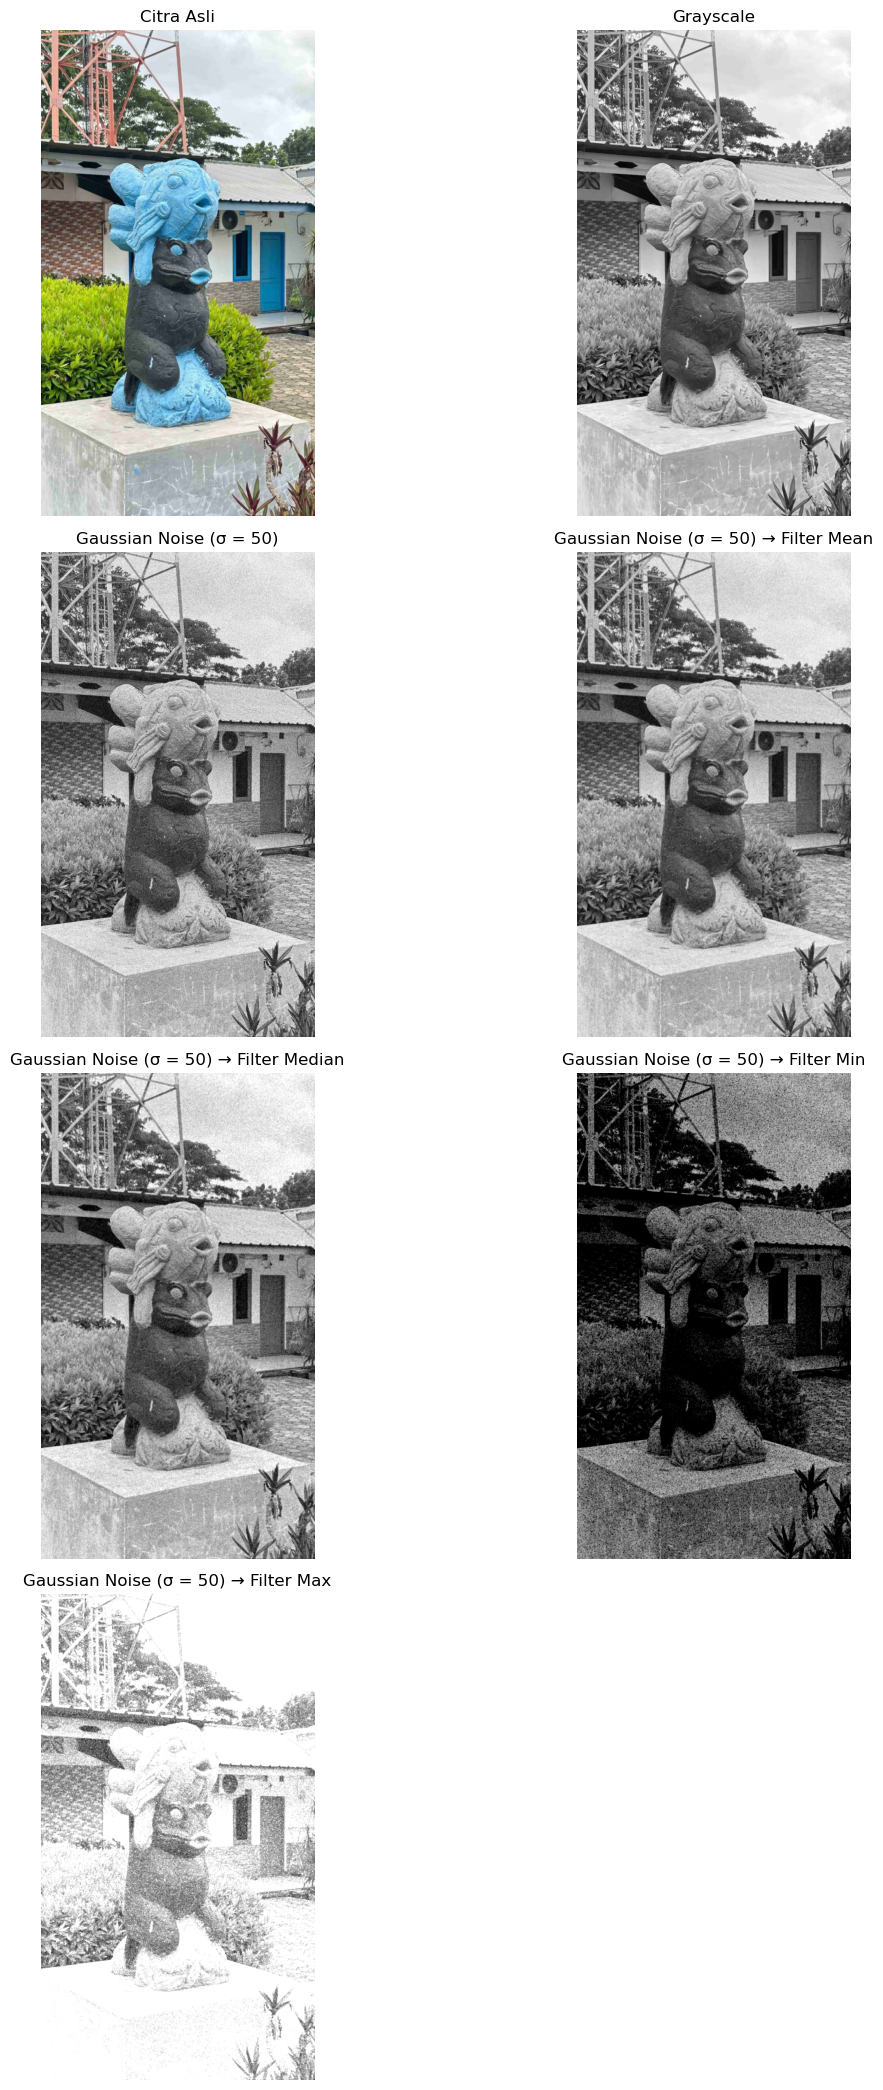

Selesai!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ===== INPUT CITRA =====
img = cv2.imread('patung2.jpg')

if img is None:
    print("Error: Gambar tidak ditemukan! Pastikan path file benar.")
else:
    img = cv2.resize(img, (img.shape[1]*2, img.shape[0]*2))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # ===== GRAYSCALE =====
    height, width, _ = img_rgb.shape
    gray = np.zeros((height, width), dtype=np.uint8)

    for i in range(height):
        for j in range(width):
            R, G, B = img_rgb[i, j]
            gray[i, j] = int(0.299*R + 0.587*G + 0.114*B)

    # ===== GAUSSIAN NOISE σ=50 =====
    mean = 0
    sigma = 50
    gray_gaussian = np.zeros_like(gray)

    for i in range(height):
        for j in range(width):
            noise = np.random.normal(mean, sigma)
            val = gray[i, j] + noise
            val = 0 if val < 0 else 255 if val > 255 else val
            gray_gaussian[i, j] = int(val)

    # ===== FILTER MANUAL 5x5 =====
    def manual_mean_filter(img, k=5):
        h, w = img.shape
        pad = k // 2
        padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
        out = np.zeros_like(img)
        for i in range(h):
            for j in range(w):
                out[i, j] = np.mean(padded[i:i+k, j:j+k])
        return out

    def manual_median_filter(img, k=5):
        h, w = img.shape
        pad = k // 2
        padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
        out = np.zeros_like(img)
        for i in range(h):
            for j in range(w):
                out[i, j] = np.median(padded[i:i+k, j:j+k])
        return out

    def manual_min_filter(img, k=5):
        h, w = img.shape
        pad = k // 2
        padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
        out = np.zeros_like(img)
        for i in range(h):
            for j in range(w):
                out[i, j] = padded[i:i+k, j:j+k].min()
        return out

    def manual_max_filter(img, k=5):
        h, w = img.shape
        pad = k // 2
        padded = cv2.copyMakeBorder(img, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
        out = np.zeros_like(img)
        for i in range(h):
            for j in range(w):
                out[i, j] = padded[i:i+k, j:j+k].max()
        return out

    mean_result = manual_mean_filter(gray_gaussian)
    median_result = manual_median_filter(gray_gaussian)
    min_result = manual_min_filter(gray_gaussian)
    max_result = manual_max_filter(gray_gaussian)

    # ===== TAMPILAN HASIL (FORMAT SERAGAM) =====
    plt.figure(figsize=(12, 21))

    plt.subplot(4, 2, 1)
    plt.title("Citra Asli")
    plt.imshow(img_rgb)
    plt.axis("off")

    plt.subplot(4, 2, 2)
    plt.title("Grayscale")
    plt.imshow(gray, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 3)
    plt.title("Gaussian Noise (σ = 50)")
    plt.imshow(gray_gaussian, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 4)
    plt.title("Gaussian Noise (σ = 50) → Filter Mean")
    plt.imshow(mean_result, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 5)
    plt.title("Gaussian Noise (σ = 50) → Filter Median")
    plt.imshow(median_result, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 6)
    plt.title("Gaussian Noise (σ = 50) → Filter Min")
    plt.imshow(min_result, cmap='gray')
    plt.axis("off")

    plt.subplot(4, 2, 7)
    plt.title("Gaussian Noise (σ = 50) → Filter Max")
    plt.imshow(max_result, cmap='gray')
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    print("Selesai!")